In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv("new ha1\HeartDiseaseTrain-Test.csv")
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


<Axes: >

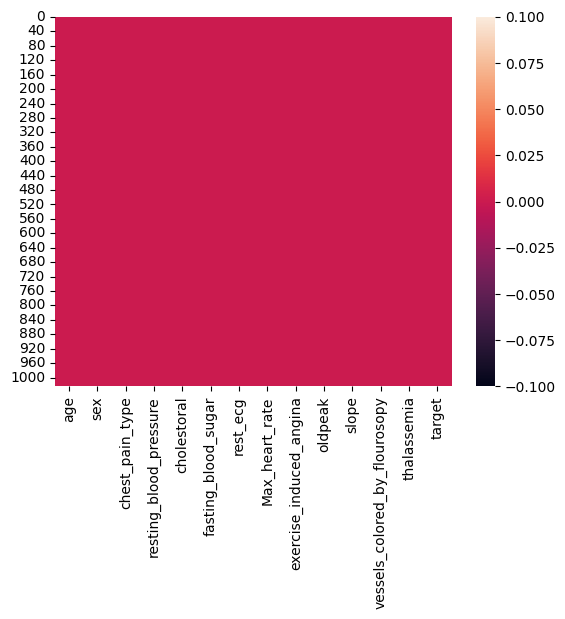

In [33]:
sns.heatmap(df.isnull())

In [34]:
columns_to_replace = ['vessels_colored_by_flourosopy', 'thalassemia']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)


<Axes: >

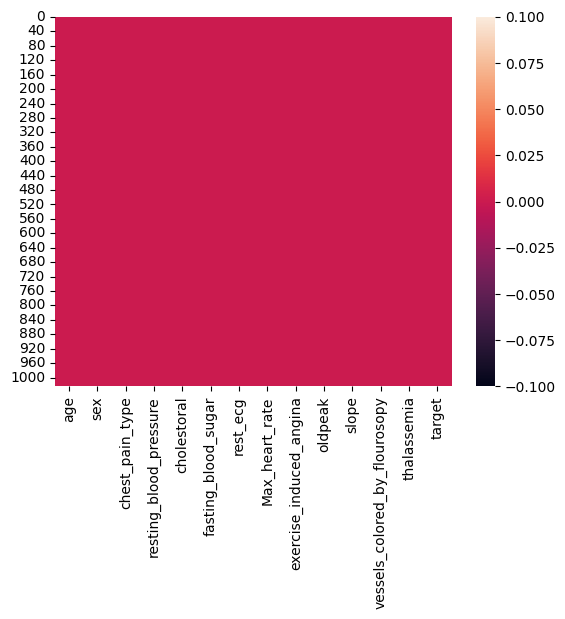

In [35]:
sns.heatmap(df.isnull())

In [36]:
df.fillna({"sex": df["sex"].mode()[0]}, inplace=True)
df.fillna({"chest_pain_type": df["chest_pain_type"].mode()[0]}, inplace=True)
df.fillna({"rest_ecg": df["rest_ecg"].mode()[0]}, inplace=True)
df.fillna({"exercise_induced_angina": df["exercise_induced_angina"].mode()[0]}, inplace=True)
df.fillna({"slope": df["slope"].mode()[0]}, inplace=True)
df.fillna({"thalassemia": df["thalassemia"].mode()[0]}, inplace=True)


In [37]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


<Axes: >

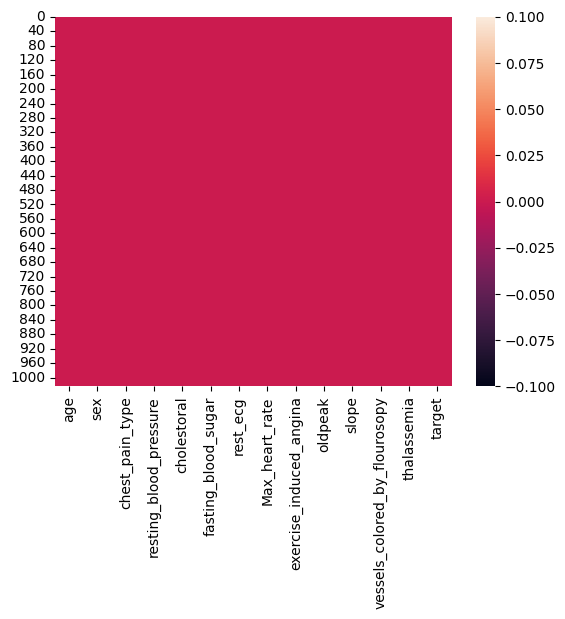

In [38]:
sns.heatmap(df.isnull())

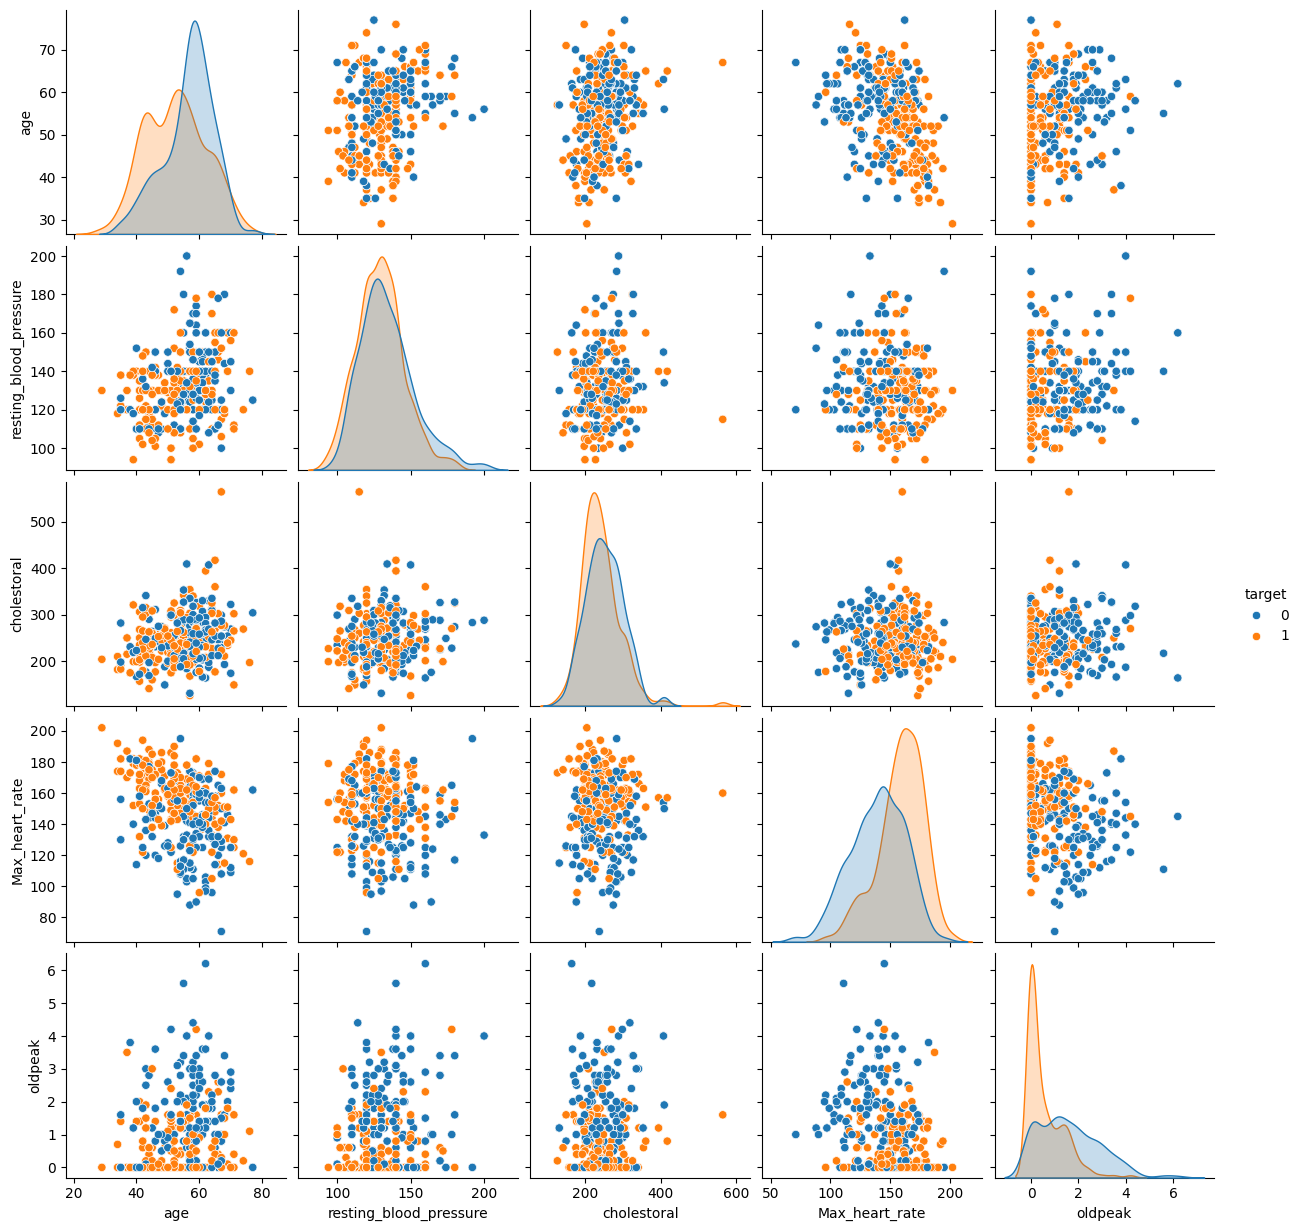

In [39]:
sns.pairplot(df,hue="target")

In [40]:
df1=df

In [41]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values

In [42]:
df1.shape

(1025, 14)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [44]:
# Check for object or category types (i.e., non-numeric)
print(df1.select_dtypes(include=['object', 'category']).columns)


Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy',
       'thalassemia'],
      dtype='object')


In [45]:
# One-hot encode all categorical variables
df1_encoded = pd.get_dummies(df1, drop_first=True)


In [46]:
from sklearn.model_selection import train_test_split

X = df1_encoded.drop("target", axis=1)  # Replace "target" with your actual target column name
y = df1_encoded["target"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  
model.fit(x_train, y_train)


c:\Users\SUBHRADIP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [48]:
model.score(x_test, y_test)


0.8146341463414634

In [49]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, model.predict(x_test))
ac

0.8146341463414634

<Axes: >

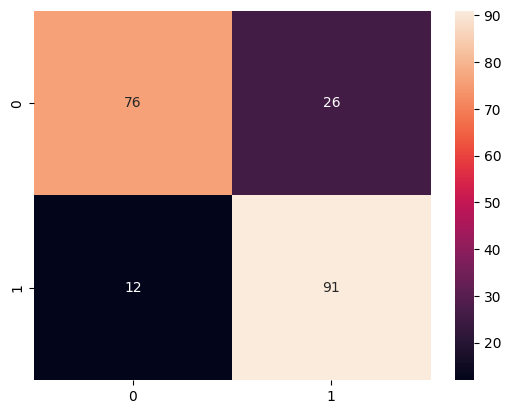

In [50]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)),annot=True)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.78      0.88      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)  

KNeighborsClassifier()

In [57]:
knn.score(x_test,y_test)

0.7317073170731707

<Axes: >

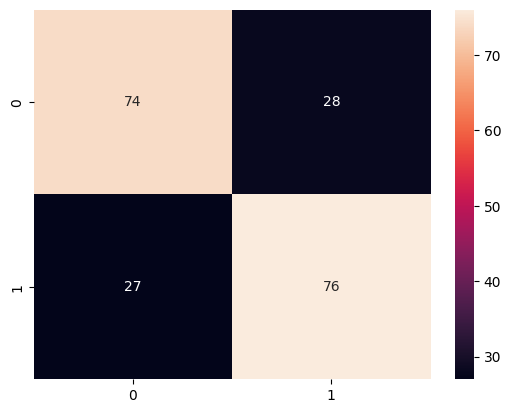

In [58]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, knn.predict(x_test)),annot=True)

In [59]:
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [ ]:
from sklearn.naive_bayes import GaussianNB
m=GaussianNB()
m.fit(x_train,y_train)

GaussianNB()

In [61]:
m.score(x_test,y_test)

0.7707317073170732

<Axes: >

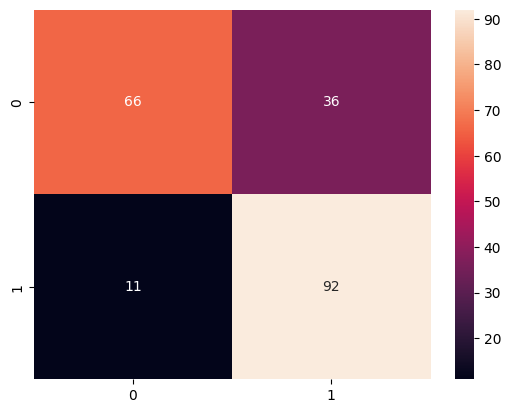

In [65]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, m.predict(x_test)),annot=True)

In [64]:
print(classification_report(y_test, m.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74       102
           1       0.72      0.89      0.80       103

    accuracy                           0.77       205
   macro avg       0.79      0.77      0.77       205
weighted avg       0.79      0.77      0.77       205



In [88]:
from sklearn.svm import SVC
ms=SVC(kernel='linear', C=1.0, random_state=42)
ms.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [90]:
ms.score(x_test,y_test)

0.8097560975609757

<Axes: >

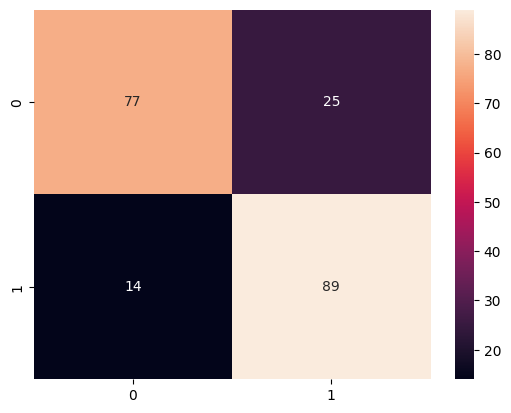

In [91]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, ms.predict(x_test)),annot=True)

In [92]:
print(classification_report(y_test, ms.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       102
           1       0.78      0.86      0.82       103

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



In [93]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
dt.score(x_test,y_test)

0.9853658536585366

<Axes: >

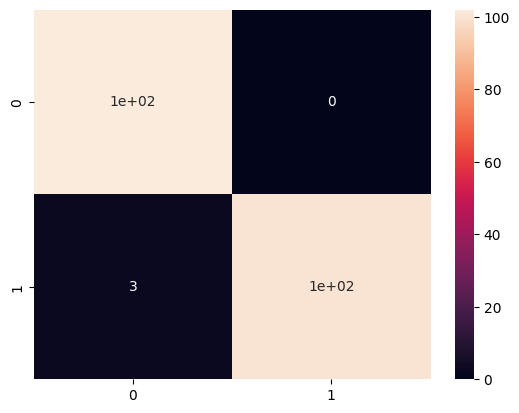

In [95]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, dt.predict(x_test)),annot=True)

In [96]:
print(classification_report(y_test, dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [97]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [98]:
rf.score(x_test,y_test)

0.9853658536585366

<Axes: >

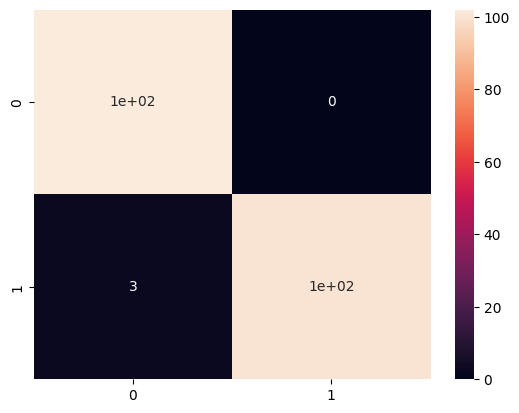

In [100]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, rf.predict(x_test)),annot=True)

In [101]:
print(classification_report(y_test, rf.predict(x_test)))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

